In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from os import mkdir, path
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.datasets import load_digits
from math import cos, sin, pi, acos
from sklearn import preprocessing
%matplotlib inline
import time

In [2]:
###############################################################################
# Plot initialization

dirname = "../prebuiltimages/"
if not path.exists(dirname):
    mkdir(dirname)

imageformat = '.pdf'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 16,
          'font.size': 23,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True
          }
plt.rcParams.update(params)
plt.close("all")


In [3]:
###############################################################################
# display function:

saving = True


def my_saving_display(fig, dirname, filename, imageformat, bbox_inches='tight'):
    """"Saving with personal function."""
    filename = filename.replace('.', 'pt')  # remove "." to avoid floats issues
    if saving is True:
        dirname + filename + imageformat
        image_name = dirname + filename + imageformat
        # BEWARE: bbox_inches='tight' helps for legend outside of bbox
        fig.savefig(image_name, bbox_inches='tight')

In [4]:
###############################################################################
# PCA interpretation

color_blind_list = sns.color_palette("colorblind", 8)

centers = [(-5, -5), (0, 0), (5, 5)]
n_samples = 50
n_features = 2
Z, _ = make_blobs(n_samples=n_samples, n_features=n_features, cluster_std=4.0,
                  centers=centers, shuffle=False, random_state=42)

scaler = StandardScaler(with_mean=True, with_std=True).fit(Z)
X = scaler.transform(Z)


my_orange = color_blind_list[2]

sns.set_context("poster")
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style("white")

s_large = 200
s_small = 50

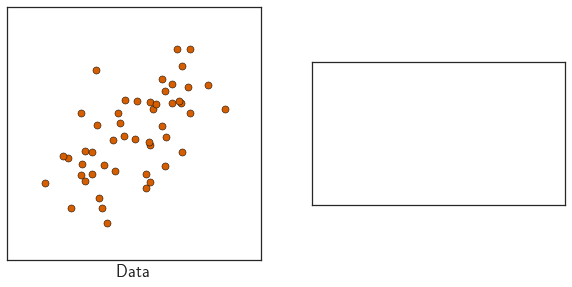

In [5]:
# Data scatterplot
fig = plt.figure(00, figsize=(10, 5))
sub1 = fig.add_subplot(121)
sub1.scatter(X[:, 0], X[:, 1], s=s_small, alpha=1, c=my_orange,
             edgecolors='k', zorder=1)
sub1.get_yaxis().set_ticks([])
sub1.get_xaxis().set_ticks([])
sub1.set_ylim([-3., 3.])
sub1.set_xlim([-3., 3.])
sub1.set_aspect('equal')
sub1.set_xlabel(u'Data')

sub2 = fig.add_subplot(122)
# sub2.plot(theta_grid, var_grid, c='k', linewidth=3, zorder=1)
sub2.set_aspect('equal')
sub2.set_ylim([0, 2.])
sub2.set_xlim([- pi / 2 - 0.2, pi / 2 + 0.2])
sub2.set_xlabel('')
sub2.set_ylabel('')
sub2.get_yaxis().set_ticks([])
sub2.get_xaxis().set_ticks([])
plt.show()

filename = 'fig_pca_axis_raw'
my_saving_display(fig, dirname, filename, imageformat)

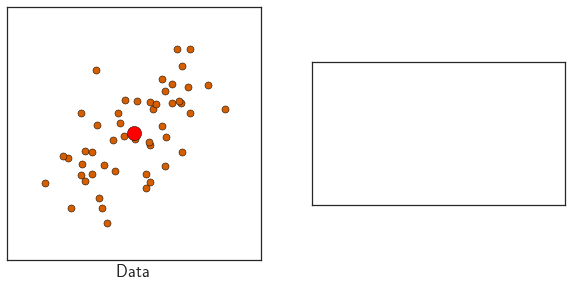

In [6]:
# with mean
fig = plt.figure(00, figsize=(10, 5))
sub1 = fig.add_subplot(121)
sub1.scatter(X[:, 0], X[:, 1], s=s_small, alpha=1, c=my_orange,
             edgecolors='k', zorder=1)
sub1.get_yaxis().set_ticks([])
sub1.get_xaxis().set_ticks([])
sub1.set_ylim([-3., 3.])
sub1.set_xlim([-3., 3.])
sub1.set_aspect('equal')
sub1.set_xlabel(u'Data')
sub1.scatter(0, 0, s=s_large, alpha=1, c='r', zorder=2, edgecolors='k')

sub2 = fig.add_subplot(122)
# sub2.plot(theta_grid, var_grid, c='k', linewidth=3, zorder=1)
sub2.set_aspect('equal')
sub2.set_ylim([0, 2.])
sub2.set_xlim([- pi / 2 - 0.2, pi / 2 + 0.2])
sub2.set_xlabel('')
sub2.set_ylabel('')
sub2.get_yaxis().set_ticks([])
sub2.get_xaxis().set_ticks([])
plt.show()
plt.show()
sub1.set_aspect('equal')
sub1.set_xlabel(u'Data and mean')
filename = 'fig_pca_axis_raw_mean'
my_saving_display(fig, dirname, filename, imageformat)
plt.show()

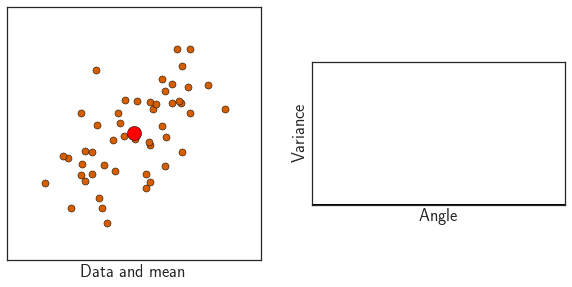

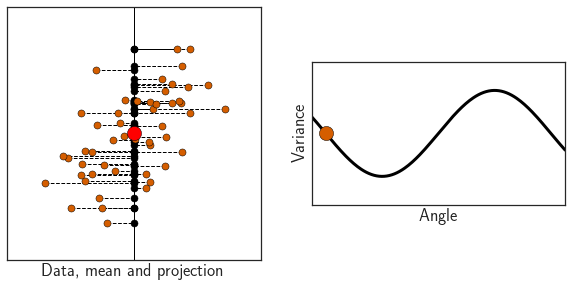

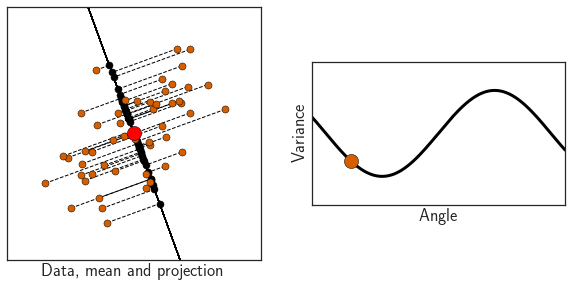

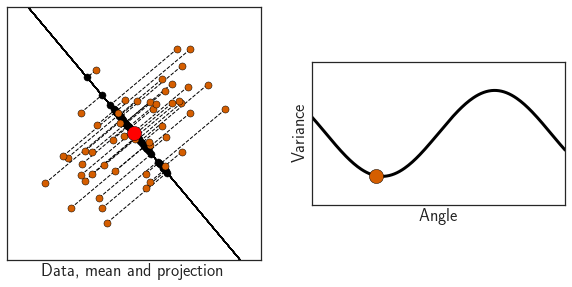

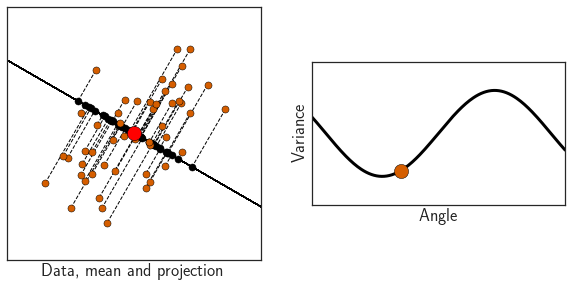

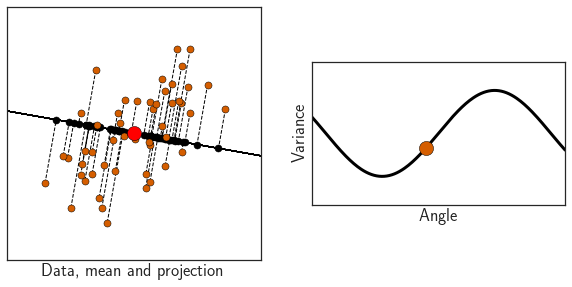

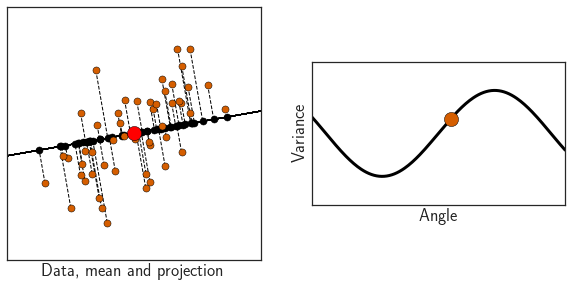

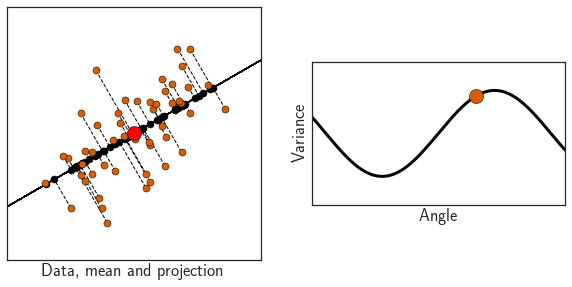

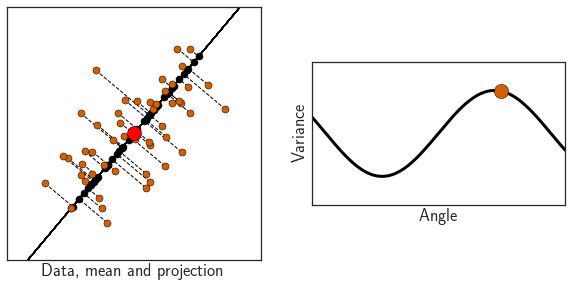

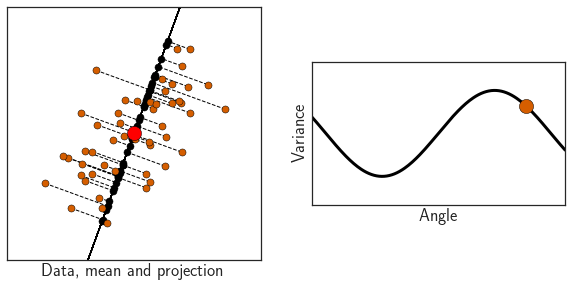

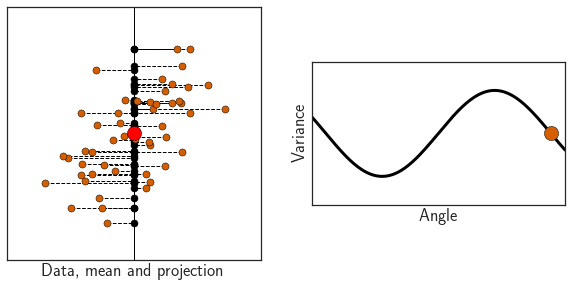

In [7]:
x_range = np.linspace(-2, 2, num=100)
X_mean = X.mean(axis=0)

thetas = np.linspace(- pi / 2, pi / 2, num=10)
theta_grid = np.linspace(- pi / 2 - 0.2, pi / 2 + 0.2, num=200)
var_grid = np.zeros(theta_grid.shape)


f, (sub1, sub2) = plt.subplots(1, 2,figsize=(10, 5))
sub1.scatter(X[:, 0], X[:, 1], s=s_small, alpha=1, c=my_orange,
             edgecolors='k', zorder=1)
sub1.get_yaxis().set_ticks([])
sub1.get_xaxis().set_ticks([])
sub1.set_ylim([-3., 3.])
sub1.set_xlim([-3., 3.])
sub1.set_aspect('equal')
sub1.set_xlabel(u'Data')
filename = 'fig_pca_axis_raw'
my_saving_display(fig, dirname, filename, imageformat)

# with mean
sub1.scatter(0, 0, s=s_large, alpha=1, c='r', zorder=2, edgecolors='k')
sub1.set_aspect('equal')
sub1.set_xlabel(u'Data and mean')
filename = 'fig_pca_axis_raw_mean'
my_saving_display(fig, dirname, filename, imageformat)

sub2.plot(theta_grid, var_grid, c='k', linewidth=3, zorder=1)
sub2.set_aspect('equal')
sub2.set_ylim([0, 2.])
sub2.set_xlim([- pi / 2 - 0.2, pi / 2 + 0.2])
sub2.set_xlabel('Angle')
sub2.set_ylabel('Variance')
sub2.get_yaxis().set_ticks([])
sub2.get_xaxis().set_ticks([])
plt.show()


for image_nb, theta in enumerate(theta_grid):
    rotation = np.asarray([cos(theta), sin(theta)])
    var_grid[image_nb] = np.var(X.dot(rotation))

for image_nb, theta in enumerate(thetas):
    fig = plt.figure(image_nb, figsize=(10, 5))
    sub1 = fig.add_subplot(121)
    sub1.set_aspect('equal')
    sub1.set_ylim([-3., 3.])
    sub1.set_xlim([-3., 3.])
    cos_var = np.asarray([cos(theta), -cos(theta)])
    sin_var = np.asarray([sin(theta), -sin(theta)])
    rotation = np.asarray([cos(theta), sin(theta)])
    points_projected = np.outer(X.dot(rotation), rotation)

    for i in range(X.shape[0]):
        point_projected = points_projected[i]
        point_ini = X[i, :]
        sub1.plot([point_ini[0], point_projected[0]],
                  [point_ini[1], point_projected[1]],
                  '--k', linewidth=1, zorder=1)
        sub1.scatter(point_projected[0], point_projected[1],
                     s=s_small, alpha=1, c='k', zorder=2)
        amplitude = 4
        sub1.plot(amplitude * cos_var, amplitude * sin_var, 'k', linewidth=1,
                  zorder=2)

    sub1.scatter(X[:, 0], X[:, 1], s=s_small, alpha=1, c=my_orange, zorder=3,
                 edgecolors='k')
    sub1.scatter(0, 0, s=s_large, alpha=1, c='r', zorder=4, edgecolors='k')
    sub1.get_yaxis().set_ticks([])
    sub1.get_xaxis().set_ticks([])
    sub1.set_xlabel(u'Data, mean and projection')

    var = np.var(X.dot(rotation))

    sub2 = fig.add_subplot(122)
    sub2.plot(theta_grid, var_grid, c='k', linewidth=3, zorder=1)
    sub2.set_aspect('equal')
    sub2.set_ylim([0, 2.])
    sub2.set_xlim([- pi / 2 - 0.2, pi / 2 + 0.2])
    sub2.scatter(theta, var, c=my_orange, s=s_large, zorder=2, edgecolors='k')
    sub2.set_xlabel('Angle')
    sub2.set_ylabel('Variance')
    sub2.get_yaxis().set_ticks([])
    sub2.get_xaxis().set_ticks([])
    plt.show()
    filename = 'fig_pca_axis' + str(image_nb)
    my_saving_display(fig, dirname, filename, imageformat)


# PCA itself

pca = PCA(n_components=2)
pca.fit(X)
rotation = np.asarray([pca.components_[0][0], pca.components_[0][0]])
X_new = np.outer(X.dot(rotation), rotation)
theta_opt = acos(pca.components_[0][0])

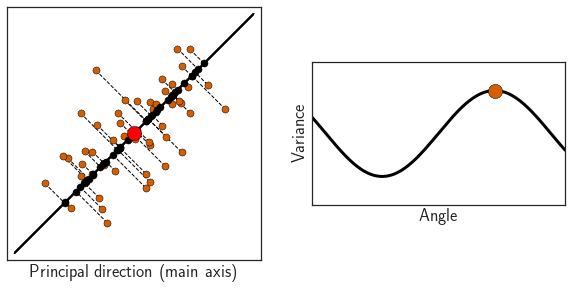

In [8]:
fig = plt.figure(30, figsize=(10, 5))
sub1 = fig.add_subplot(121)
sub1.scatter(X[:, 0], X[:, 1], s=s_small, alpha=1, c=my_orange, zorder=3,
             edgecolors='k')
sub1.get_yaxis().set_ticks([])
sub1.get_xaxis().set_ticks([])
sub1.set_ylim([-3., 3.])
sub1.set_xlim([-3., 3.])
sub1.set_xlabel(u'Principal direction (main axis)')
sub1.set_aspect('equal')

for i in range(X.shape[0]):
    point_projected = X_new[i]
    point_ini = X[i, :]
    sub1.plot([point_ini[0], point_projected[0]],
              [point_ini[1], point_projected[1]],
              '--k', linewidth=1, zorder=2)
    sub1.scatter(point_projected[0], point_projected[1],
                 s=s_small, alpha=1, c='k', zorder=3)
    amplitude = 4
    cos_var = np.asarray([pca.components_[0][0], -pca.components_[0][0]])
    sin_var = np.asarray([pca.components_[0][1], -pca.components_[0][0]])
    sub1.plot(amplitude * cos_var, amplitude * sin_var, 'k', linewidth=1,
              zorder=2)


sub1.scatter(0, 0, s=s_large, alpha=1, c='r', zorder=3, edgecolors='k')

# BEWARE: normalisation is by 1 / (n_samples - 1) in sklearn:
var_opt = pca.explained_variance_[0] * (n_samples - 1) / (n_samples)

sub2 = fig.add_subplot(122)
sub2.plot(theta_grid, var_grid, c='k', linewidth=3, zorder=1)
sub2.set_aspect('equal')
sub2.set_ylim([0, 2.])
sub2.set_xlim([- pi / 2 - 0.2, pi / 2 + 0.2])
sub2.scatter(theta_opt, var_opt, c=my_orange, s=s_large, zorder=2,
             edgecolors='k')
sub2.set_xlabel('Angle')
sub2.set_ylabel('Variance')
sub2.get_yaxis().set_ticks([])
sub2.get_xaxis().set_ticks([])
filename = 'fig_pca_axis_opt'
my_saving_display(fig, dirname, filename, imageformat)
plt.show()

# Exploration avec la PCA de la base de données *Digits*

In [9]:
digits = load_digits()
X = digits.data
y = digits.target

n_samples, n_features = X.shape
n_digits = len(np.unique(y))

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))
sns.set(style="white")

n_digits: 10, 	 n_samples 1797, 	 n_features 64


# Visualisation d'un element de la base sous forme d'image:

(1797, 2)

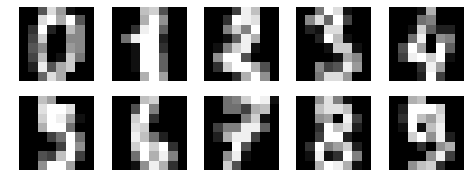

In [10]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2,5,i + 1)
    digit = X[i]
    ax.imshow(digit.reshape(8, 8), cmap=plt.cm.gray, interpolation="nearest")
    ax.axis('off')

filename = 'fig_digits'
my_saving_display(fig, dirname, filename, imageformat)    
    
transfo = PCA(n_components=2)
X_2d = transfo.fit_transform(X)
X_2d.shape

# Visualisation en 2D des données (projection sur les deux axes principaux)

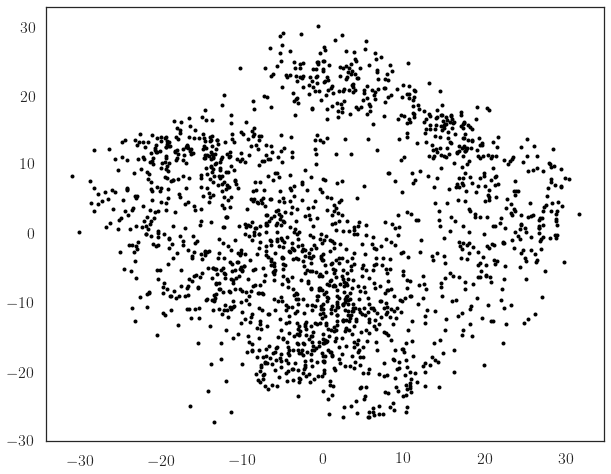

In [11]:
sns.set_context("poster")
sns.set_palette("Paired", n_colors=10)
fig = plt.figure(figsize=(10, 8))
plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=8)
filename = 'fig_pca_digits_wo_classes'
my_saving_display(fig, dirname, filename, imageformat)

# Visualisation en 2D des données (projection sur les deux axes principaux) + coleur correspondant aux diverses classse

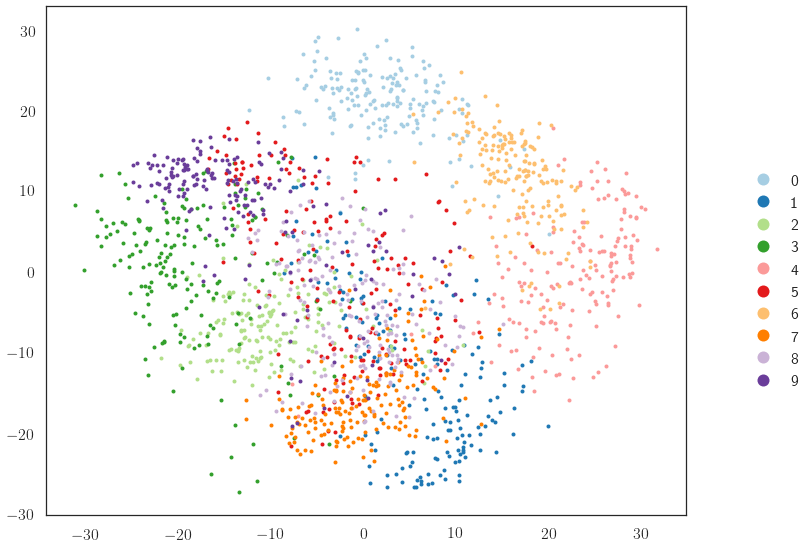

In [12]:
fig = plt.figure(figsize=(10, 8))
for k in range(10):
    Xk_2d = X_2d[y == k]
    plt.plot(Xk_2d[:, 0], Xk_2d[:, 1], '.', markersize=8, label=k)
    plt.legend(numpoints=1,loc=1, bbox_to_anchor=(1.2, 0.7), markerscale=3)
plt.tight_layout()
plt.show()
filename = 'fig_pca_digits_w_classes'
my_saving_display(fig, dirname, filename, imageformat)

# Une alternative non linéaire:  t-distributed Stochastic Neighbor Embedding (t-SNE)

In [13]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

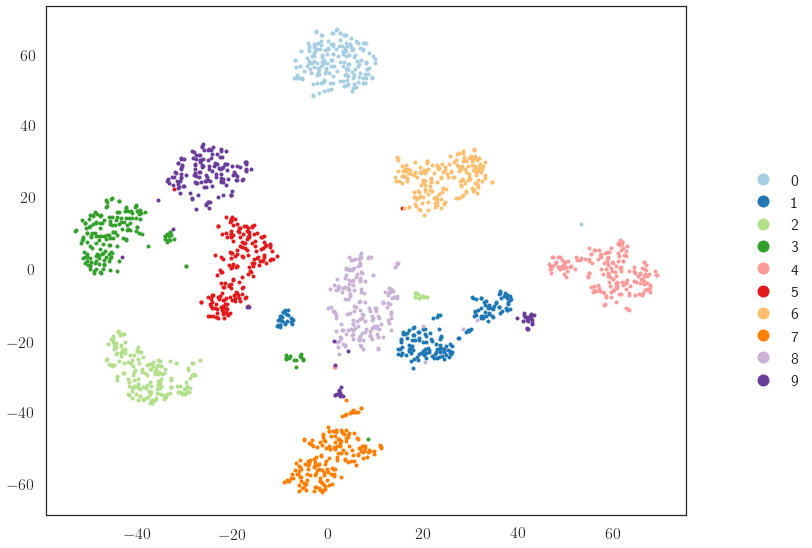

In [14]:
fig = plt.figure(figsize=(10, 8))
for k in range(10):
    X_tsne_int = X_tsne[y == k]
    plt.plot(X_tsne_int[:, 0], X_tsne_int[:, 1], '.', markersize=8, label=k)
    plt.legend(numpoints=1,loc=1, bbox_to_anchor=(1.2, 0.7), markerscale=3)
plt.tight_layout()
plt.show()
filename = 'fig_tsne_digits_w_classes'
my_saving_display(fig, dirname, filename, imageformat)

# Timing comparisons for various SVD solvers

Adapted from http://blog.explainmydata.com/2016/01/how-much-faster-is-truncated-svd.html

In [15]:
RANK = 99
N_COLS = 2000
min_rows = 100
max_rows = 2000

# Define useful functions for SVD solvers comparisons

In [16]:
def evaluate_svd(svd_fn, reconstruct_fn, min_rows=100, max_rows=1000,
                 n_samples=10, n_cols=N_COLS, rank=RANK, random_seed=0):
    """ SVD evaluation:
    Return n_rows, time_elimes, errors
    """
    np.random.seed(random_seed)
    time_elimes = []
    errors = []
    n_rows_array = (np.linspace(min_rows, max_rows, num=n_samples)).astype(int)

    for n_rows in n_rows_array:
        # construct a low-rank matrix
        left = np.random.randn(n_rows, rank)
        right = np.random.randn(rank, n_cols)
        full = np.dot(left, right)

        # how long does it take to perform the SVD?
        start_t = time.time()
        svd_outputs = svd_fn(full)
        end_t = time.time()
        time_el = end_t - start_t
        time_elimes.append(time_el)

        # compute mean absolte error of reconstruction
        reconstructed = reconstruct_fn(svd_outputs)
        diff = full - reconstructed
        mae = np.mean(np.abs(diff))
        errors.append(mae)
        #print("n_rows=%d , time = %0.4f, MAE = %0.8f" % (n_rows, time_el, mae))
        print("n_rows=%d , time = %0.4f" % (n_rows, time_el))
    max_error = np.max(errors)
    print("Max Error=%f" % max_error)
    assert max_error < 0.0000001
    return n_rows_array, time_elimes, errors


# Full SVD with NumPy
def np_svd(X):
    """
    Compute SVD with numpy method
    """
    return np.linalg.svd(X, full_matrices=False, compute_uv=True)


def np_inv_svd(svd_outputs):
    """
    Compute reconstruction from SVD with numpy method
    """
    U, s, V = svd_outputs
    return np.dot(U, np.dot(np.diag(s), V))


# Truncated SVD with scikit-learn
def skl_svd(X, rank=RANK):
    """
    Compute SVD with skl method
    """
    tsvd = decomposition.TruncatedSVD(rank)
    X_reduced = tsvd.fit_transform(X)
    return (tsvd, X_reduced)


def skl_inv_svd(svd_outputs):
    """
    Compute reconstruction from SVD with skl method
    """
    tsvd, X_reduced = svd_outputs
    return tsvd.inverse_transform(X_reduced)


def skl_rand_svd(X, rank=RANK):
    """
    Compute approximated SVD with skl method (randomized algorithm)
    """
    tsvd = decomposition.TruncatedSVD(rank, algorithm="randomized",
                                      n_iter=1)
    X_reduced = tsvd.fit_transform(X)
    return (tsvd, X_reduced)


def skl_arpack_svd(X, rank=RANK):
    """
    Compute approximated SVD with skl method (Arpack algorithm)
    """
    tsvd = decomposition.TruncatedSVD(rank, algorithm="arpack")
    X_reduced = tsvd.fit_transform(X)
    return (tsvd, X_reduced)

# Perform timings:

In [17]:
n_rows, np_times, np_errors = evaluate_svd(np_svd, np_inv_svd,
                                           min_rows=min_rows, max_rows=max_rows,
                                           n_samples=10, n_cols=N_COLS, rank=RANK)

n_rows=100 , time = 0.0099
n_rows=311 , time = 0.0463
n_rows=522 , time = 0.1123
n_rows=733 , time = 0.2062
n_rows=944 , time = 0.3069
n_rows=1155 , time = 0.6845
n_rows=1366 , time = 2.2598
n_rows=1577 , time = 2.8028
n_rows=1788 , time = 3.4890
n_rows=2000 , time = 4.5060
Max Error=0.000000


In [18]:
n_rows, skl_rand_times, skl_rand_err = evaluate_svd(skl_rand_svd, skl_inv_svd,
                                           min_rows=min_rows, max_rows=max_rows,
                                           n_samples=10, n_cols=N_COLS, rank=RANK)

n_rows=100 , time = 0.0123
n_rows=311 , time = 0.0218
n_rows=522 , time = 0.0326
n_rows=733 , time = 0.0431
n_rows=944 , time = 0.0545
n_rows=1155 , time = 0.0621
n_rows=1366 , time = 0.0609
n_rows=1577 , time = 0.0674
n_rows=1788 , time = 0.0753
n_rows=2000 , time = 0.0948
Max Error=0.000000


In [19]:
n_rows, skl_arpack_times, skl_arpack_err = evaluate_svd(skl_arpack_svd, skl_inv_svd,
                                           min_rows=min_rows, max_rows=max_rows,
                                           n_samples=10, n_cols=N_COLS, rank=RANK)

n_rows=100 , time = 0.0124
n_rows=311 , time = 0.0767
n_rows=522 , time = 0.2926
n_rows=733 , time = 0.4354
n_rows=944 , time = 0.5554
n_rows=1155 , time = 0.6322
n_rows=1366 , time = 0.7410
n_rows=1577 , time = 0.9113
n_rows=1788 , time = 1.0106
n_rows=2000 , time = 1.0912
Max Error=0.000000


# Display

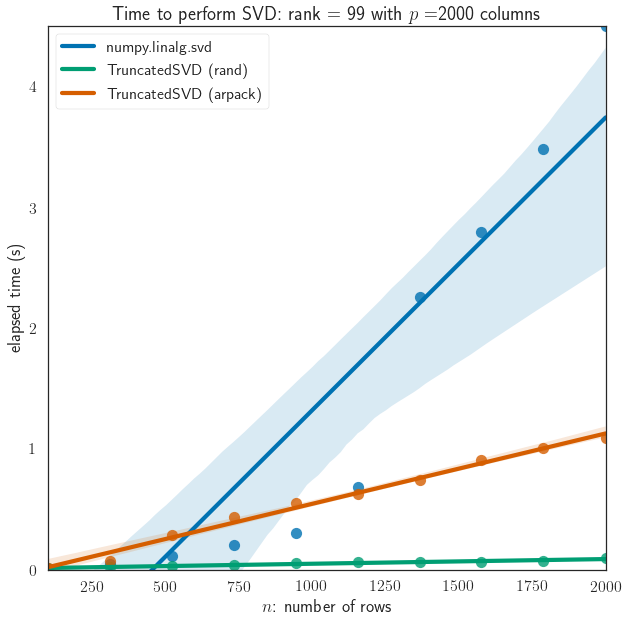

In [21]:
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style({'legend.frameon': True})

fig = plt.figure(figsize=(10, 10))
plt.xlim(min_rows, max_rows)
plt.ylim(0, np.max([np_times, skl_rand_times, skl_arpack_times]))

x_axis = pd.Series(n_rows, name="$n$: number of rows")

sns.regplot(x=x_axis, y=pd.Series(np_times, name="elapsed time (s)"))
sns.regplot(x=x_axis, y=pd.Series(skl_rand_times, name="elapsed time (s)"))
sns.regplot(x=x_axis, y=pd.Series(skl_arpack_times, name="elapsed time (s)"))


plt.legend(("numpy.linalg.svd", "TruncatedSVD (rand)",
            "TruncatedSVD (arpack)"), loc='upper left')
plt.title("Time to perform SVD:" +
          " rank = {0} with $p=${1} columns".format(RANK, N_COLS))
plt.show()
filename = 'timinng_svd'
my_saving_display(fig, dirname, filename, imageformat)